<a href="https://colab.research.google.com/github/BHAVYA-3806/Text-Generation-TOPSIS-/blob/main/TextGeneration(TOPSIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [17]:
class ModelEvaluator:
    def __init__(self):
        # Define the models and their characteristics
        self.models = [
            'LLaMA-7B',
            'GPT-3.5-Turbo',
            'Mistral-7B',
            'Falcon-40B',
            'T5-Large'
        ]

        # Define evaluation criteria
        self.criteria = [
            'Perplexity',        # Lower is better
            'Generation_Speed',   # Higher is better
            'Model_Size_GB',     # Lower is better
            'Memory_Usage_GB',    # Lower is better
            'BLEU_Score'         # Higher is better
        ]

        # Sample data - replace with your actual measurements
        self.decision_matrix = np.array([
            [12.0, 120, 13, 8, 40.2],  # LLaMA-7B
            [10.5, 140, 15, 12, 42.5], # GPT-3.5-Turbo
            [11.8, 100, 10, 7, 38.7],  # Mistral-7B
            [9.2, 90, 40, 20, 45.3],   # Falcon-40B
            [13.5, 110, 3, 6, 37.1]    # T5-Large
        ])

        # Criteria weights (must sum to 1)
        self.weights = np.array([0.3, 0.2, 0.15, 0.15, 0.2])

        # Criteria type: 1 for benefit (higher better), -1 for cost (lower better)
        self.criteria_type = np.array([-1, 1, -1, -1, 1])

    def normalize_matrix(self):
        """Normalize the decision matrix"""
        scaler = MinMaxScaler()
        normalized = scaler.fit_transform(self.decision_matrix)
        # Adjust for criteria type (cost/benefit)
        normalized = normalized * self.criteria_type.reshape(1, -1)
        return normalized

    def calculate_topsis(self):
        """Calculate TOPSIS scores"""
        # Normalize the decision matrix
        normalized = self.normalize_matrix()

        # Weight the normalized matrix
        weighted = normalized * self.weights

        # Ideal best and worst solutions
        ideal_best = np.max(weighted, axis=0)
        ideal_worst = np.min(weighted, axis=0)

        # Calculate distances
        d_best = np.sqrt(np.sum((weighted - ideal_best)**2, axis=1))
        d_worst = np.sqrt(np.sum((weighted - ideal_worst)**2, axis=1))

        # Calculate relative closeness
        topsis_scores = d_worst / (d_worst + d_best)

        return topsis_scores

    def plot_results(self):
        """Create visualizations for the analysis"""
        scores = self.calculate_topsis()

        # 1. Bar plot of TOPSIS scores
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.bar(self.models, scores)
        plt.title('TOPSIS Scores by Model')
        plt.xticks(rotation=45)
        plt.ylabel('TOPSIS Score')

        # 2. Radar chart of normalized criteria
        normalized = self.normalize_matrix()
        angles = np.linspace(0, 2*np.pi, len(self.criteria), endpoint=False)

        fig = go.Figure()
        for idx, model in enumerate(self.models):
            fig.add_trace(go.Scatterpolar(
                r=normalized[idx],
                theta=self.criteria,
                name=model
            ))

        fig.update_layout(
            polar=dict(radialaxis=dict(visible=True, range=[-1, 1])),
            showlegend=True,
            title='Model Comparison Across Criteria'
        )

        # 3. Create results DataFrame
        results_df = pd.DataFrame({
            'Model': self.models,
            'TOPSIS Score': scores
        })
        results_df = results_df.sort_values('TOPSIS Score', ascending=False)

        return fig, results_df

    def generate_report(self):
        """Generate a complete analysis report"""
        scores = self.calculate_topsis()
        normalized = self.normalize_matrix()

        report = pd.DataFrame({
            'Model': self.models,
            'TOPSIS Score': scores,
            **{criterion: normalized[:, i] for i, criterion in enumerate(self.criteria)}
        }).sort_values('TOPSIS Score', ascending=False)

        return report

In [18]:
def main():
    evaluator = ModelEvaluator()

    # Generate and display results
    radar_plot, results = evaluator.plot_results()
    full_report = evaluator.generate_report()

    print("\nModel Rankings:")
    print(results)

    print("\nDetailed Analysis Report:")
    print(full_report)

    # Save visualizations
    radar_plot.write_html("model_comparison_radar.html")
    plt.savefig("topsis_scores.png")



Model Rankings:
           Model  TOPSIS Score
1  GPT-3.5-Turbo      0.712232
3     Falcon-40B      0.552912
0       LLaMA-7B      0.494749
2     Mistral-7B      0.436923
4       T5-Large      0.373677

Detailed Analysis Report:
           Model  TOPSIS Score  Perplexity  Generation_Speed  Model_Size_GB  \
1  GPT-3.5-Turbo      0.712232   -0.302326               1.0      -0.324324   
3     Falcon-40B      0.552912   -0.000000               0.0      -1.000000   
0       LLaMA-7B      0.494749   -0.651163               0.6      -0.270270   
2     Mistral-7B      0.436923   -0.604651               0.2      -0.189189   
4       T5-Large      0.373677   -1.000000               0.4      -0.000000   

   Memory_Usage_GB  BLEU_Score  
1        -0.428571    0.658537  
3        -1.000000    1.000000  
0        -0.142857    0.378049  
2        -0.071429    0.195122  
4        -0.000000    0.000000  


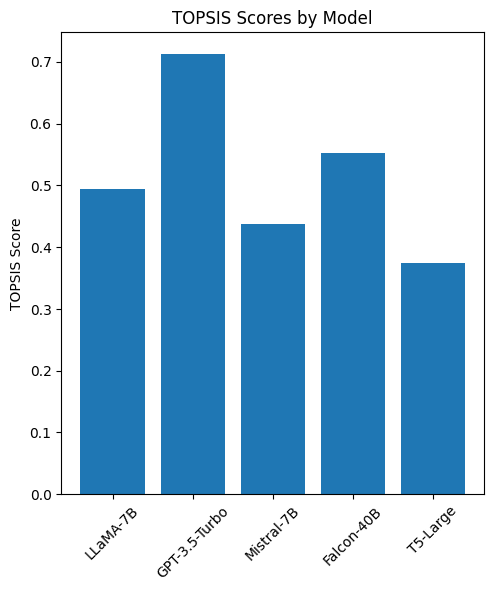

In [19]:
if __name__ == "__main__":
  main()